## Youtube (오늘코드todaycode)참조

## 시계열 데이터 시각화 하기
### 항공사 직원이라 가정하고 시계열 데이터를 통한 수요 분석하기
### 가설을 세우고 검정하기 : 여름 휴가철에는 항공이용이 많을 것이다.
### 이 분석을 통해 우리가 얻을 수 있는 것 ?
* 추세를 파악할 수 있음
    * 수요가 늘어나고 있다면 늘어나는 수요에 대비
    * 수요가 줄어들고 있다면 서비스 개선을 하거나 새로운 사업계획을 세우기
* 계절에 따라 수요에 대한 계획을 세울 수 있음
    * 재고량, 예산, 운영인력, 시스템을 구성하는 서버의 트래픽 양 등

In [10]:
# 라이브러리 로드
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [17]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [18]:
# 데이터셋 로드하기
df = sns.get_dataset_names()
df

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [23]:
# 데이터셋 로드하기
# df = sns.load_dataset("flights")
# df.shape
# 내장데이터를 불러오지 못할때 홈페이지 크롤링으로 바로 불러올수 있다.
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv')
df.shape

(144, 3)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null object
passengers    144 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


In [25]:
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### 같은 데이터로 다양한 시각화 해보기
* bar, line, point, box, violin, swarm plot

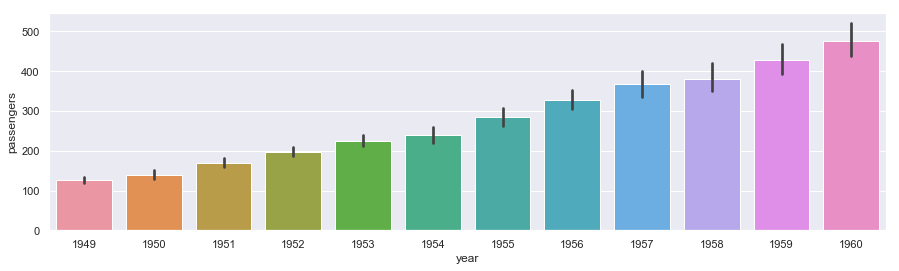

In [27]:
# barplot
plt.figure(figsize=(15,4))
sns.barplot(data=df, x='year', y='passengers')

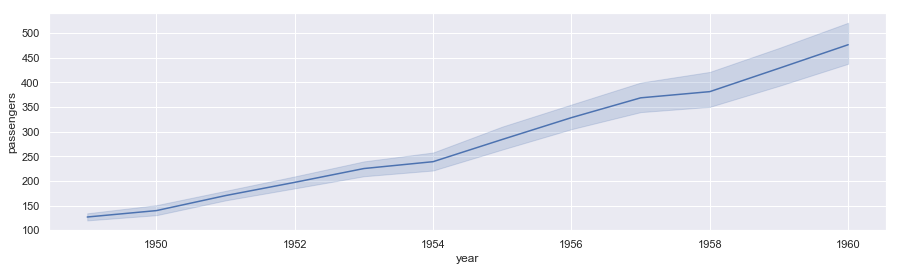

In [28]:
# lineplot
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x='year', y='passengers')

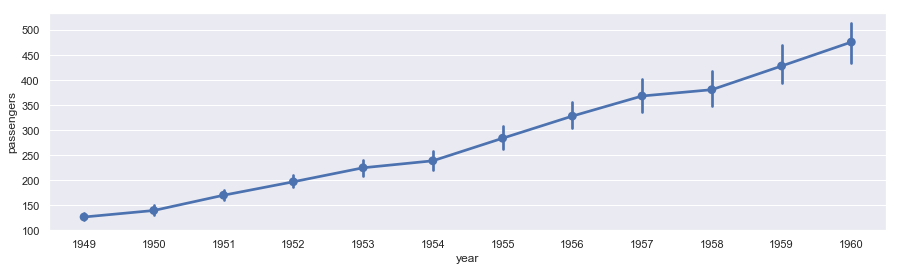

In [29]:
# pointplot
plt.figure(figsize=(15,4))
sns.pointplot(data=df, x='year', y='passengers')

* lengend를 그래프의 밖에 그리기 : matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow

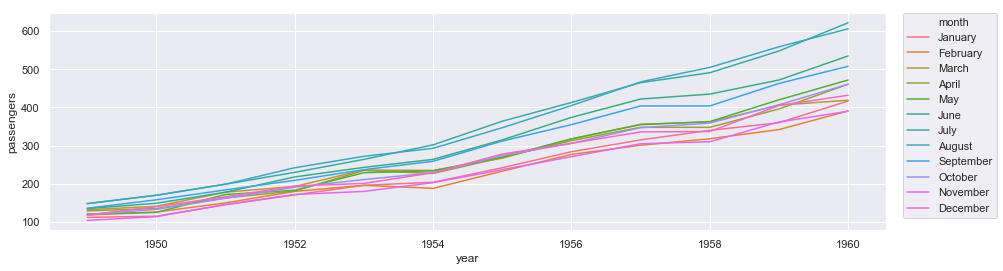

In [33]:
# lineplot 에 hue를 통해 month 값에 따라 여러 색으로 나눠 그리기 
plt.figure(figsize=(15,4))
sns.lineplot(data=df , x='year', y='passengers', hue='month')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

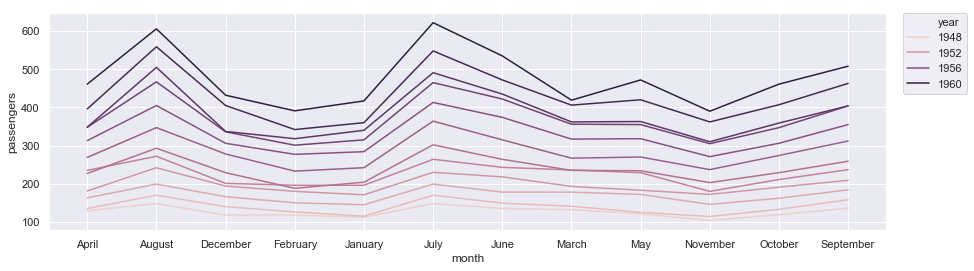

In [34]:
# lineplot 에 hue를 통해 year 값에 따라 여러 색으로 나눠 그리기 

plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x="month", y="passengers", hue="year")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

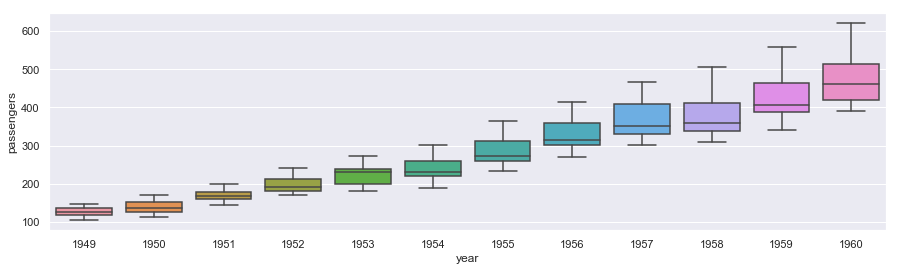

In [35]:
# boxplot 
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="year", y="passengers")

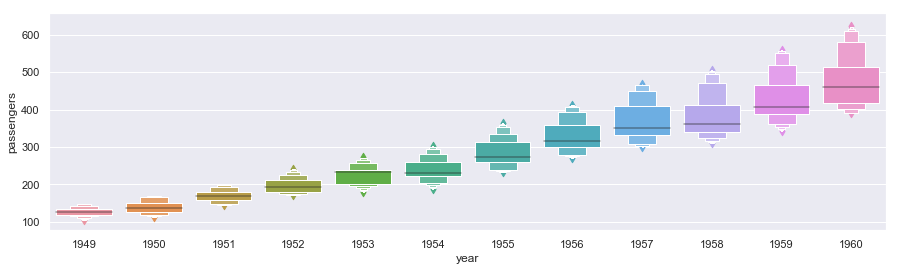

In [36]:
plt.figure(figsize=(15, 4))
sns.boxenplot(data=df, x="year", y="passengers")

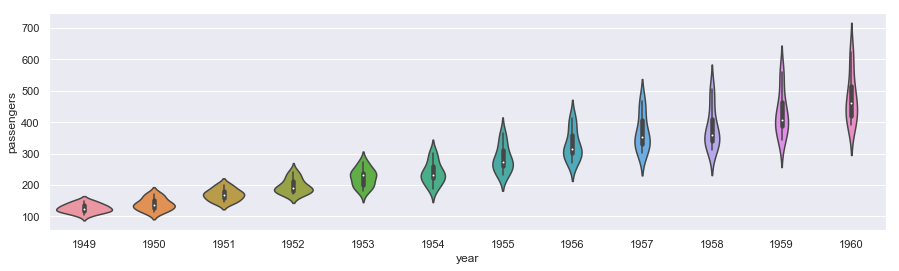

In [37]:
# violinplot

plt.figure(figsize=(15, 4))
sns.violinplot(data=df, x="year", y="passengers")

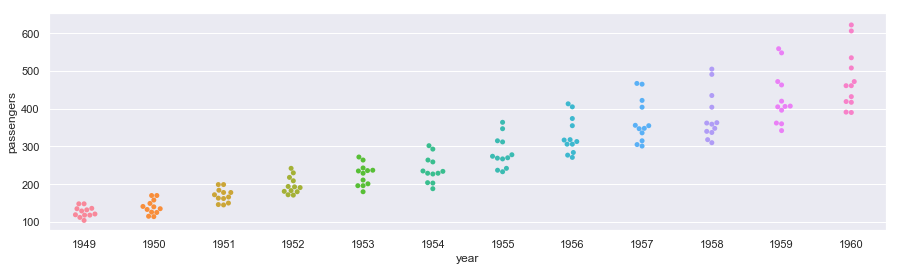

In [38]:
# swarmplot - 범주형 데이터의 산점도를 그리고자 할 때

plt.figure(figsize=(15, 4))
sns.swarmplot(data=df, x="year", y="passengers")

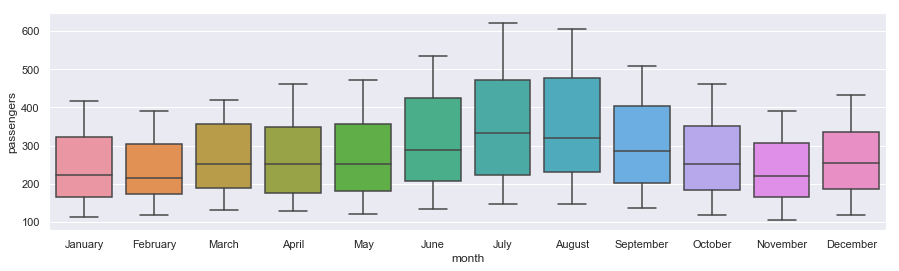

In [39]:
# boxplot - 위에서는 year를 기준으로 그렸지만 month 값을 x축으로 그려봅니다.

plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="month", y="passengers")

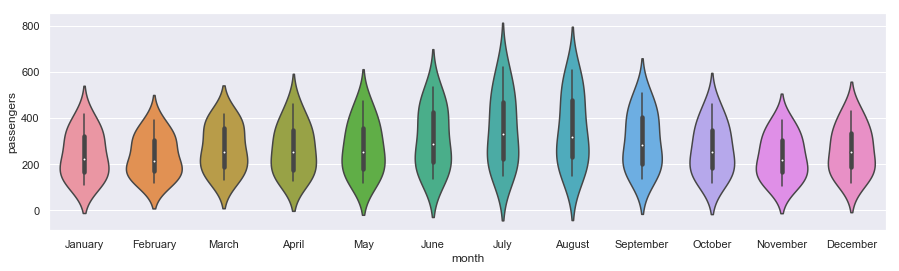

In [40]:
# violinplot

plt.figure(figsize=(15, 4))
sns.violinplot(data=df, x="month", y="passengers")

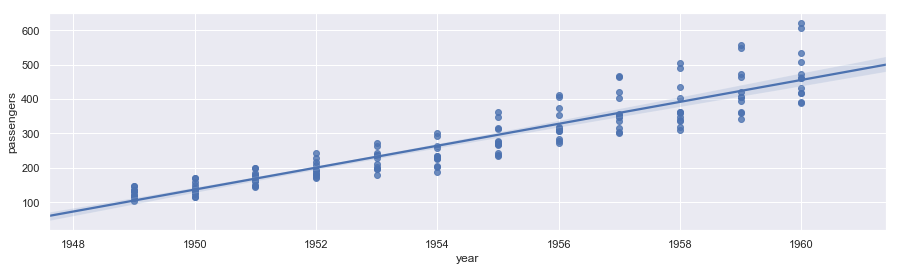

In [41]:
# regplot - 회귀선을 그려줍니다.

plt.figure(figsize=(15, 4))
sns.regplot(data=df, x="year", y="passengers")

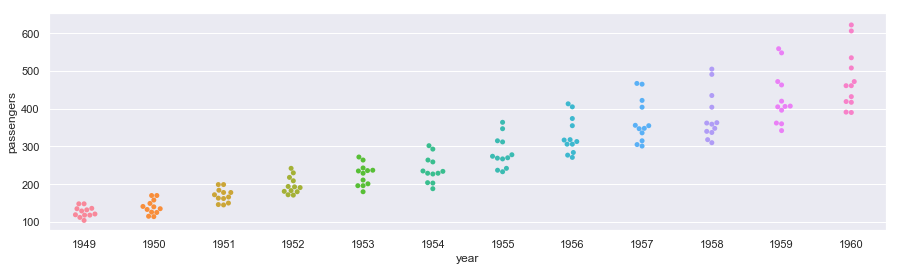

In [42]:
# swarmplot

plt.figure(figsize=(15, 4))
sns.swarmplot(data=df, x="year", y="passengers")

### pivot으로 데이터 형태 바꾸기

In [44]:
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [45]:
df_h = df.pivot(index='month',columns='year',values='passengers')
df_h

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417
July,148,170,199,230,264,302,364,413,465,491,548,622
June,135,149,178,218,243,264,315,374,422,435,472,535
March,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


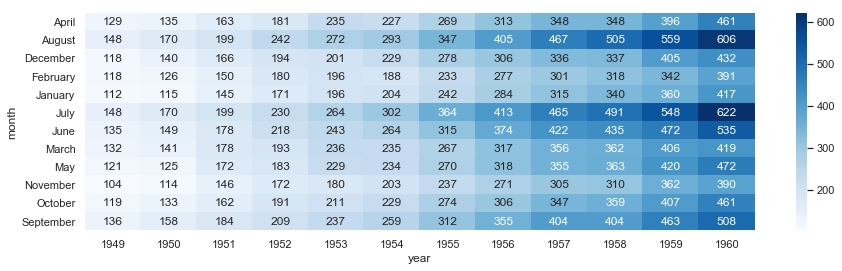

In [49]:
# heatmap
plt.figure(figsize=(15,4))
sns.heatmap(df_h,annot=True, fmt='.0f', cmap='Blues')

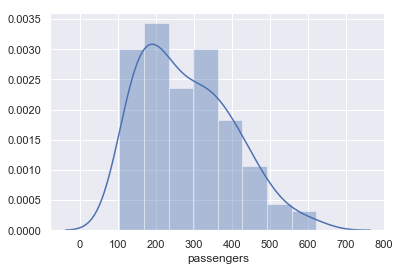

In [52]:
# distplot
sns.distplot(df['passengers'])

### 서브플롯 그리기

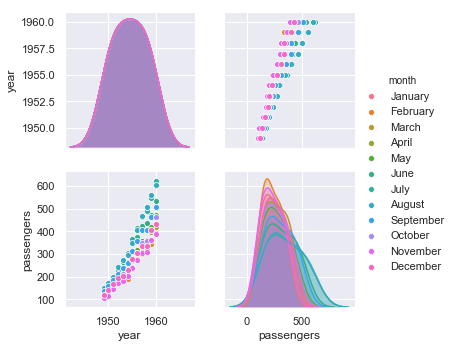

In [53]:
# sns.pairplot
sns.pairplot(data=df, hue='month')

<Figure size 576x288 with 0 Axes>

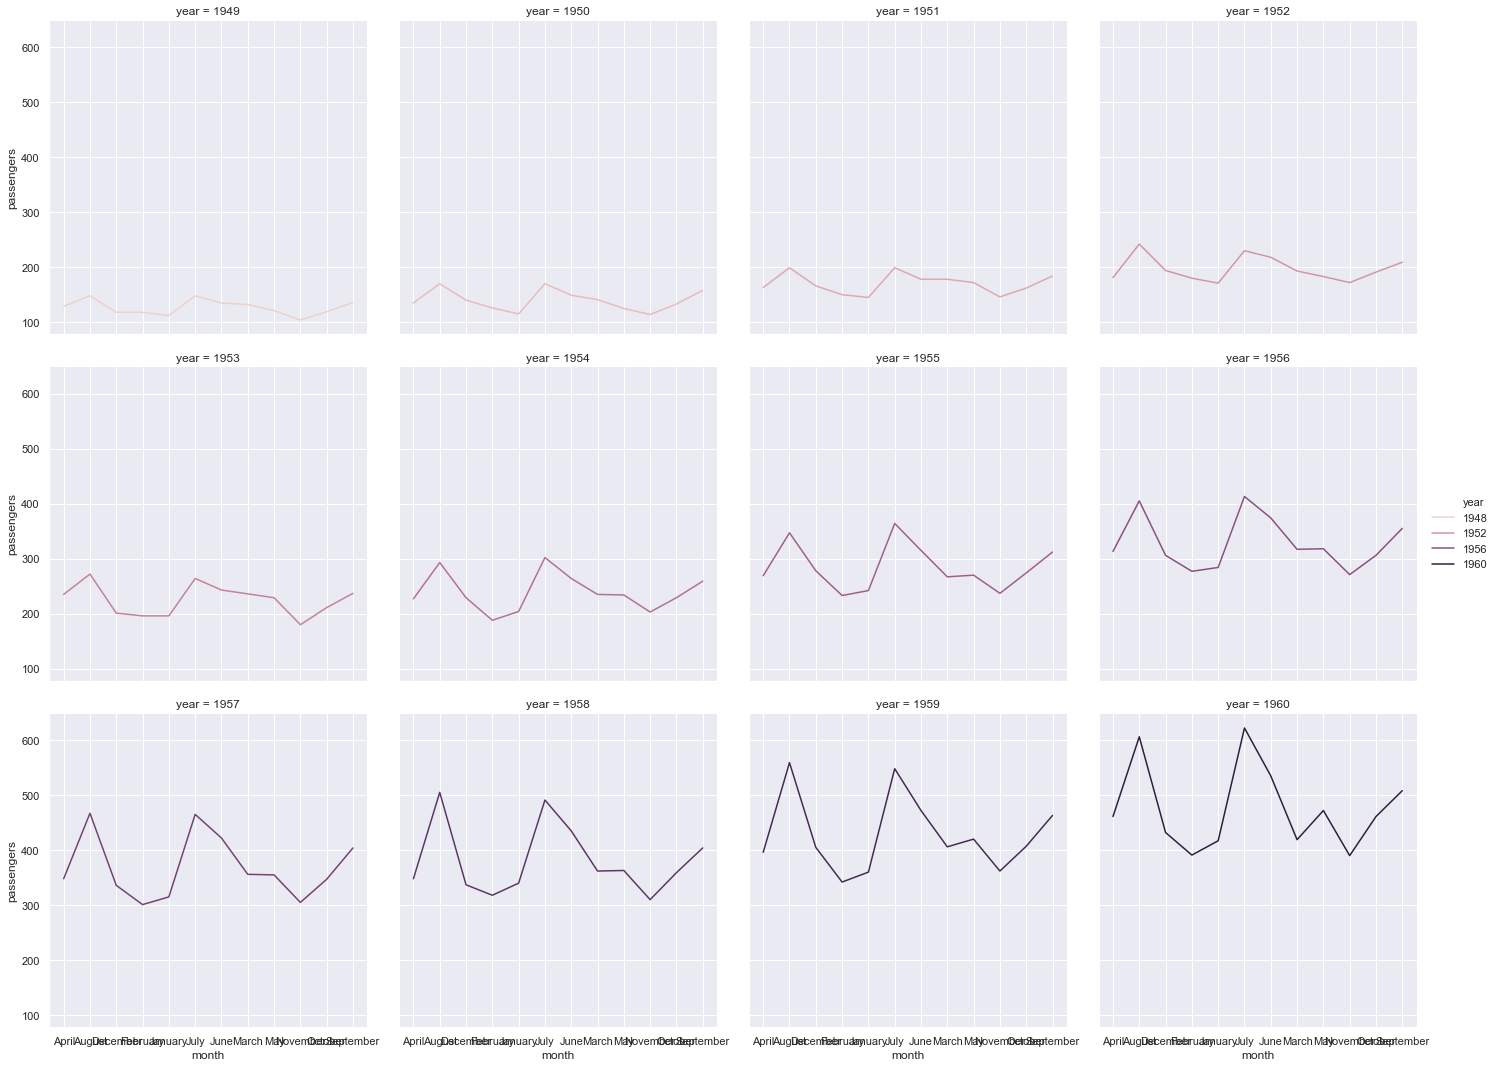

In [60]:
# relplot
sns.relplot(data=df, x='month', y='passengers',kind='line', hue='year',col='year', col_wrap=4)

### datetime 형태로 변환해서 보기
* datetime 변환하기 https://docs.python.org/ko/3/library/datetime.html#strftime-strptime-behavior

In [61]:
# 날짜 변환을 하기 전에 동작을 확인하고 변환 함수를 만듭니다.
from datetime import datetime
year = 2020
month = "March"

s = f"{year} {month} 1"
d = datetime.strptime(s, "%Y %B %d")
d.strftime("%Y-%m-%d")

'2020-03-01'

In [62]:
# find_datetime 함수를 만들어서 date 형태로 반환하도록 합니다.
def find_datetime(row):
    year = row['year']
    month = row['month']
    
    s = f"{year} {month} 1"
    d = datetime.strptime(s, "%Y %B %d")
    return d.strftime("%Y-%m-%d")

In [63]:
row = {'year': 1949, 'month' : 'January'}
find_datetime(row)

'1949-01-01'

In [66]:
# 판다스의 apply 를 사용해서 위에서 만든 함수를 적용해 줍니다.
import pandas as pd
df['date'] = df.apply(find_datetime, axis=1)
df['date'] = pd.to_datetime(df['date'])
df['date'].head(1)

0   1949-01-01
Name: date, dtype: datetime64[ns]

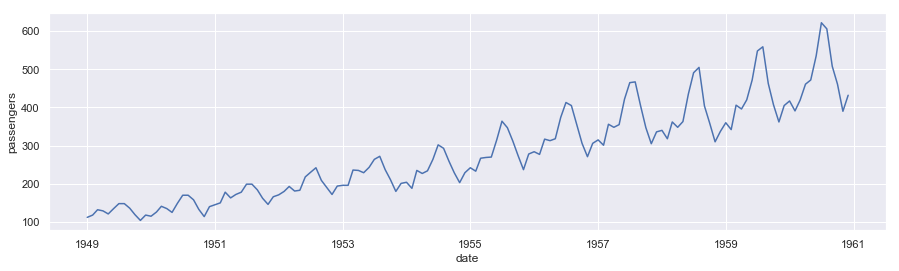

In [67]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x="date", y="passengers")

### Time Series data Decomposition(시계열 데이터 분해)
* Trend
* Seasonal
* Residual(random, remainder)
### statsmodels 로 Trend, Seasonal, Residual 한번에 보기
* 공식 문서 : Installing statsmodels — statsmodels
* 별도의 설치가 필요
    * pip 사용시 : pip install statsmodels
    * 아나콘다 사용시 : conda install -c conda-forge statsmodels

In [73]:
# statsmodels 를 사용하기 위해서는 아래와 같이 포맷을 변경해 줄 필요가 있음
df_date = df[['date','passengers']].set_index('date')
df_date.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### 시계열 분해
#### Additive Model
* 값을 더해서 구함
<div align="left"><img src=" ../img/시계열.png" ></div>

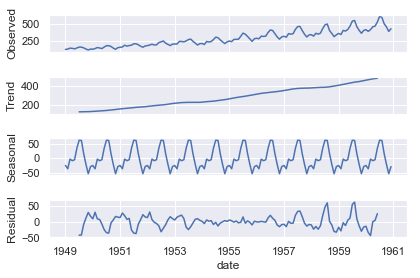

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df_date, model='additive')
d = decomp.plot()

### Multiplicative Model
* 값을 곱해서 구함
<div align="left"><img src=" ../img/시계열.png" ></div>

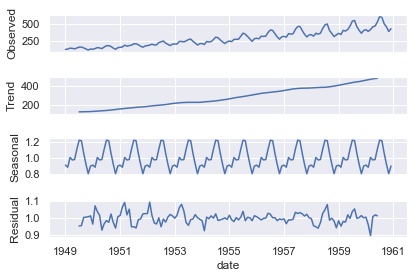

In [75]:
decomp = seasonal_decompose(df_date, model='multiplicative')
d = decomp.plot()